<a href="https://colab.research.google.com/github/Riasat38/CSE440-Natural-Language-Processing-/blob/main/440_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
!pip install nltk


In [ ]:
import nltk
import pandas as pd
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
print(imdb.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
imdb['review'] = imdb['review'].str.lower()
print(imdb.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [ ]:
import string
imdb['review'] = imdb['review'].apply(
    lambda text: text.translate(str.maketrans('', '', string.punctuation))
)
print(imdb.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(imdb['review'])
y = imdb['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, stratify = y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f1 score for KNN classifier:  0.7669710950004708


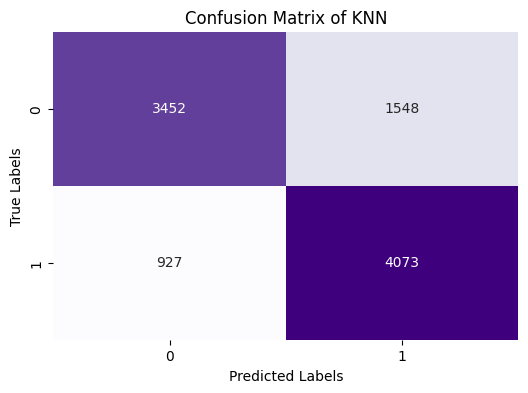

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

f1s = f1_score(y_test, y_pred)
print("f1 score for KNN classifier: ",f1s)
knnc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knnc, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy as np

def load_glove(path, dim=200):
    glove = {}
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != dim + 1:
                continue
            word = parts[0]
            vec = np.array(parts[1:], dtype='float32')
            glove[word] = vec
    return glove


In [ ]:
def most_similar(vec, glove):
    sims = {}
    for word, w_vec in glove.items():
        sim = np.dot(vec, w_vec) / (np.linalg.norm(vec) * np.linalg.norm(w_vec))
        sims[word] = sim

    return sorted(sims.items(), key=lambda x: x[1], reverse=True)

In [ ]:
glove = load_glove("/content/drive/MyDrive/glove.6B.200d.txt")

v = glove['queen'] - glove['female'] + glove['male']
result = most_similar(v, glove)

for word, score in result:
   if word not in ['queen', 'female', 'male']:
        print("Result:", word)
        break

Result: king


In [ ]:
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA


In [ ]:
import numpy
import gensim
print(f"NumPy version: {numpy.__version__}")
print(f"Gensim version: {gensim.__version__}")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
docs = gutenberg.fileids()
corpus = []
for id in docs:
    text = gutenberg.raw(id).lower()
    tokenized = word_tokenize(text)
    corpus.append(tokenized)


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4, sg=0)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject